# Basketball Bucks: The Secret Factors That Make Certain Players Filthy Rich 
---
Team Member Net IDs:
- Frannie Lach (fel9)
- Shelby Ragin (scr86)
- Siddarth Sankaran (svs36)

## Introduction: 
---
Basketball is the highest paid sport in the entire world. The average annual salary for professional men's basketball players falls around $ 3.9 million and this does not include sponsors, endorsments, or appearances. We find it intriguing how some players, who we think are not that good, make a substantial amount of money whereas other players who are phenomenal get paid pennies. 

Our group has decided to investigate which specific factors contribute the most to a professional basketball player's salary. Are the salaries decided simply on game performance? Do players coming from "basketball schools" such as Duke or University of Kentucky have a leg up when negotiating their salary? Do certain teams pay much higher salaries than others? Do the tallest players in the league get paid more simply because they are closer to the rim? 

Our goal was to analyze every single factor that contributes to a player's salary. We want to know if we can predict the salary of a certain player in the league based off of the information we have on the player. We also wanted to see if we coud apply our findings to college basketball in an attempt to make salary predictions on a few of the players in the upcoming draft. Lastly, our group wanted to investigate these factors and determine if there are any inequitable salary disparities within professional basketball as a whole. We plan on doing so by using linear regressions, multivariable regressions, correlation coefficents, and other models to measure the impact of NBA metrics on player salary.

**Hypothesis:** Our hypothesis is that the factors with the highest correlation with salary will relate to experience such as age and/or years in the league. We also beleive that the better basketball teams (teams with the best rankings) will have the budget to pay their players more money. Therefore, we anticpate that the higher ranked teams will have higher average salaries and that there will be a strong correlation between the player's ranking and salary.   

**Findings:** We found that performance metrics and the player's current ranking in the league are the factors that have the highest correlation with salary. We found that there are disparities between WNBA and NBA salaries, however, we did not have enough evidence suggesting there are salary disparities on the basis of race within the NBA.

## Data Description:
---
The following data descriptions revolve around the data we extracted or found online. These datasets were then the basis of what we used to create new csv files which we will expand upon under our Data Cleaning section.

### NBA Salaries Data
Sid (): 

### WNBA Salaries Data
This data was extracted from Spotrac's Women's National Basketball Assosiation's page. The page has each player's name, team, position, age and salary. Our team beleive's this website to be repuatable and unbiased. All of the information (apart from the salaries) can be easily assessed by anyone via the internet. Each players base salaries are decided every few years with the amount it will increase each year. This information is then released to the public. Our team was able to extract this data directly from the website and then insert it into Jupyter Notebook as a list and then append each catagory and then morphe them together into a csv file. The website link can be found at https://www.spotrac.com/wnba/rankings/base/

### WNBA Rankings Data
This data was added as a list from HashTagBasketball. The website ranks each team and moves them up or down by their performance in the most recent season. Our team assumes there is very litte bias as these rankings are based off of winnings. The rankings were created and edited by Aneela Khan and Eric Nemchock. They are both women's basketball bloggers and write for HashTagBasketball. The link can be found at https://hashtagbasketball.com/wnba/wnba-power-rankings

## Preregistration Statements:
---

**Analysis 1: Which specific components contribute the most to a player's salary? Can we predict the salaries of the NBA players with these components?**
-
We want to create a multilinear regression model that will predict a current NBA player's salary. We will look at all of the current NBA players' salaries and different components to see if there is a correlation with salary and each component. We will analyze components relating to league performance and limited components. Some examples of  performance components we plan to anlayze will be points per game, assists per game, rebounds per game, 3 point %, free throw %, and number of 3 pointers made in a game. Some of the limited components we will look at are seniority, team the player is on, height, and the college team. We will look at all of these compenents and determine which have the strongest correlation with the salary. Given these inputs, we think we will be able to predict the salary of any given player.   

**Analysis 2: Is there racial discrimination relating to salaries within the NBA?** 
---
 We would like to see if there is a wage gap based on race/ethnicity. We will compare the average salaries for each race and show this data. We will then look at each race's performance metrics and attempt to determine if there is a salary gap between players of these different races. We plan to capture the performance metrics of a player by looking at their performance and overall ranking.  We will then determine if the gaps (if there are any) are sustantiated or unsubstantiated. We assume the gaps will be substantiated if certain races are paid more on averge even though their performance/ranking foes not match up.

In [5]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Analysis:
___


### NBA Salary Data
First we will analyze some of the NBA salaries and corresponding data. 

In [85]:
player_metrics = pd.read_csv("nba_data.csv")
player_metrics.head()

,Unnamed: 0,player,team,AGE,MIN,GP,PTS,REB,AST,PLUS_MINUS,TOV,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,RANK,salary
0,0,Aaron Gordon,ORL,24.0,32.5,62,14.4,7.7,3.7,-1.1,1.6,0.437,1.2,0.308,2.4,0.674,60.0,18136364.0
1,1,Aaron Holiday,IND,23.0,24.5,66,9.5,2.4,3.4,1.7,1.3,0.414,1.3,0.394,1.1,0.851,314.0,2345640.0
2,2,Abdel Nader,OKC,26.0,15.8,55,6.3,1.8,0.7,-1.5,0.8,0.468,0.9,0.375,0.9,0.773,378.0,1752950.0
3,4,Admiral Schofield,WAS,23.0,11.2,33,3.0,1.4,0.5,-1.7,0.2,0.380,0.6,0.311,0.3,0.667,414.0,1517981.0
4,5,Al Horford,PHI,34.0,30.2,67,11.9,6.8,4.0,1.9,1.2,0.450,1.5,0.350,0.9,0.763,40.0,27500000.0


In [86]:
print("Overall Salary Summary")
print(round(player_metrics['salary'].describe()))

Overall Salary Summary
count         389.0
mean      8600459.0
std       9365328.0
min        263995.0
25%       2075880.0
50%       4642800.0
75%      11500000.0
max      43006362.0
Name: salary, dtype: float64


In [87]:
print("Top 5 Highest Paid Players")
player_metrics.nlargest(5, 'salary')

Top 5 Highest Paid Players


,Unnamed: 0,player,team,AGE,MIN,GP,PTS,REB,AST,PLUS_MINUS,TOV,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,RANK,salary
339,472,Stephen Curry,GSW,32.0,27.9,5,20.8,5.2,6.6,-9.0,3.2,0.402,2.4,0.245,5.2,1.000,1.0,43006362.0
53,78,Chris Paul,OKC,35.0,31.5,70,17.6,5.0,6.7,4.7,2.3,0.489,1.6,0.365,3.6,0.907,3.0,41358814.0
325,453,Russell Westbrook,HOU,31.0,36.0,57,27.2,7.9,7.0,2.2,4.5,0.472,1.0,0.258,5.1,0.763,2.0,41358814.0
166,228,James Harden,HOU,30.0,36.5,68,34.3,6.6,7.5,4.2,4.5,0.444,4.4,0.355,10.2,0.865,5.0,40824000.0
238,338,LeBron James,LAL,35.0,34.6,67,25.3,7.8,10.2,6.6,3.9,0.493,2.2,0.348,3.9,0.693,6.0,39219565.0


In [88]:
print("Top 5 Ranked Players")
player_metrics.nsmallest(5, 'RANK')

Top 5 Ranked Players


,Unnamed: 0,player,team,AGE,MIN,GP,PTS,REB,AST,PLUS_MINUS,TOV,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,RANK,salary
339,472,Stephen Curry,GSW,32.0,27.9,5,20.8,5.2,6.6,-9.0,3.2,0.402,2.4,0.245,5.2,1.000,1.0,43006362.0
325,453,Russell Westbrook,HOU,31.0,36.0,57,27.2,7.9,7.0,2.2,4.5,0.472,1.0,0.258,5.1,0.763,2.0,41358814.0
53,78,Chris Paul,OKC,35.0,31.5,70,17.6,5.0,6.7,4.7,2.3,0.489,1.6,0.365,3.6,0.907,3.0,41358814.0
166,228,James Harden,HOU,30.0,36.5,68,34.3,6.6,7.5,4.2,4.5,0.444,4.4,0.355,10.2,0.865,5.0,40824000.0
238,338,LeBron James,LAL,35.0,34.6,67,25.3,7.8,10.2,6.6,3.9,0.493,2.2,0.348,3.9,0.693,6.0,39219565.0


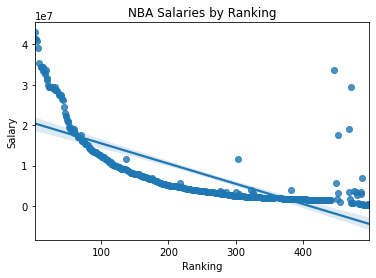

In [89]:
sns.regplot(x="RANK", y="salary", data=player_metrics)
plt.xlabel('Ranking')
plt.ylabel('Salary')
plt.title('NBA Salaries by Ranking')
plt.show()

In [90]:
print("Top 5 Youngest Players")
player_metrics.nsmallest(5, 'AGE')

Top 5 Youngest Players


,Unnamed: 0,player,team,AGE,MIN,GP,PTS,REB,AST,PLUS_MINUS,TOV,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,RANK,salary
328,457,Sekou Doumbouya,DET,19.0,19.8,38,6.4,3.1,0.5,-4.6,0.9,0.390,0.7,0.286,0.8,0.674,266.0,3449400.0
347,482,Talen Horton-Tucker,LAL,19.0,13.5,6,5.7,1.2,1.0,-3.0,1.0,0.467,0.7,0.308,0.3,0.500,420.0,1517981.0
387,544,Zion Williamson,NOP,19.0,27.8,24,22.5,6.3,2.1,2.6,2.5,0.583,0.3,0.429,4.8,0.640,117.0,10245480.0
29,44,Bol Bol,DEN,20.0,12.4,7,5.7,2.7,0.9,-3.0,1.4,0.500,0.6,0.444,1.1,0.800,344.0,2058240.0
43,62,Cam Reddish,ATL,20.0,26.7,58,10.5,3.7,1.5,-4.2,1.7,0.384,1.4,0.332,1.7,0.802,224.0,4458000.0


In [91]:
print("Top 5 Oldest Players")
player_metrics.nlargest(5, 'AGE')

Top 5 Oldest Players


,Unnamed: 0,player,team,AGE,MIN,GP,PTS,REB,AST,PLUS_MINUS,TOV,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,RANK,salary
373,521,Udonis Haslem,MIA,40.0,11.0,4,3.0,4.0,0.3,-4.8,0.3,0.364,0.3,0.333,0.8,0.750,302.0,2564753.0
14,20,Andre Iguodala,MIA,36.0,19.9,21,4.6,3.7,2.4,-1.2,1.2,0.432,0.7,0.298,0.3,0.400,80.0,15000000.0
47,66,Carmelo Anthony,POR,36.0,32.8,58,15.4,6.3,1.5,0.3,1.7,0.430,1.5,0.385,2.3,0.845,299.0,2564753.0
150,207,J.J. Barea,DAL,36.0,15.5,29,7.7,1.8,3.9,0.7,1.3,0.411,1.1,0.376,0.7,0.909,306.0,2564753.0
53,78,Chris Paul,OKC,35.0,31.5,70,17.6,5.0,6.7,4.7,2.3,0.489,1.6,0.365,3.6,0.907,3.0,41358814.0


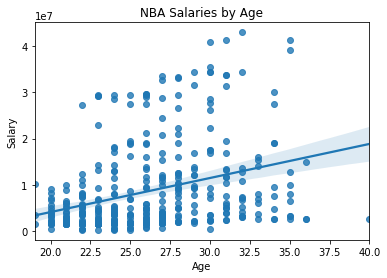

In [92]:
sns.regplot(x="AGE", y="salary", data=player_metrics)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('NBA Salaries by Age')
plt.show()

In [194]:
team_data = player_metrics.copy()
print("Top Paying Teams in the League")
team_data.groupby("team")["salary"].mean().round(0).nlargest(10).to_frame()

Top Paying Teams in the League


,salary
team,
GSW,12033644.0
CLE,11454659.0
PHI,11037608.0
SAS,10882664.0
MIL,10548104.0
DET,10337961.0
UTA,9892110.0
DEN,9872189.0
HOU,9811627.0


In [292]:
print("Team Average Salary Stats")
team_data.groupby("team")["salary"].mean().describe().round(0)

Team Average Salary Stats


count          30.0
mean      8661721.0
std       1881180.0
min       4338117.0
25%       7774265.0
50%       8596088.0
75%       9857049.0
max      12033644.0
Name: salary, dtype: float64

In [195]:
print("Lowest Paying Teams in the League")
team_data.groupby("team")["salary"].mean().round(0).nsmallest(10).to_frame()

Lowest Paying Teams in the League


,salary
team,
ATL,4338117.0
NYK,4982542.0
CHI,5853713.0
WAS,6226128.0
CHA,6235696.0
DAL,6787000.0
NOP,7547215.0
MEM,7757493.0
MIA,7824580.0


In [97]:
nba_background = pd.read_csv("nba_background.csv")
nba_background.head()

,Unnamed: 0,player,team,AGE,RANK,salary,college,height,position,weight,shoots
0,22,Steven Adams,OKC,26.0,39.0,27528090.0,University of Pittsburgh,7.00,Center,265.0,Right
1,24,Bam Adebayo,MIA,22.0,200.0,5115492.0,University of Kentucky,6.10,Center,255.0,Right
2,43,LaMarcus Aldridge,SAS,34.0,59.0,19078340.0,University of Texas at Austin,6.11,Power Forward and Center,260.0,Right
3,44,LaMarcus Aldridge,SAS,34.0,468.0,19078340.0,University of Texas at Austin,6.11,Power Forward and Center,260.0,Right
4,56,Grayson Allen,MEM,24.0,308.0,2545320.0,Duke University,6.50,Shooting Guard,198.0,Right


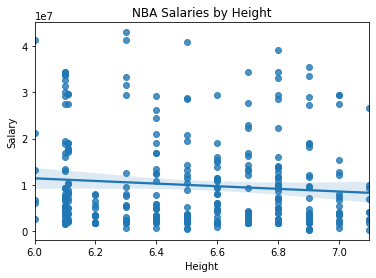

In [99]:
sns.regplot(x="height", y="salary", data=nba_background)
plt.xlabel('Height')
plt.ylabel('Salary')
plt.title('NBA Salaries by Height')
plt.show()

In [189]:
print("Mean Salary of All Players in NBA:", player_metrics['salary'].round(1).mean())
print("Mean Salary of NBA Players that played in a US College:", nba_background['salary'].round(1).mean())

Mean Salary of All Players in NBA: 8600458.691516709
Mean Salary of NBA Players that played in a US College: 9930564.166666666


In [190]:
college_data = nba_background.copy()
college_data = college_data[college_data.groupby('college').college.transform('count')>2]

print("Top Colleges: Schools with the Most Players in the League")
college_data.groupby("college")["player"].count().nlargest(10).to_frame()

Top Colleges: Schools with the Most Players in the League


,player
college,
University of Kentucky,18
Duke University,17
"University of California, Los Angeles",11
University of Texas at Austin,9
University of Kansas,8
University of North Carolina,8
Villanova University,7
Wake Forest University,7
Indiana University,6


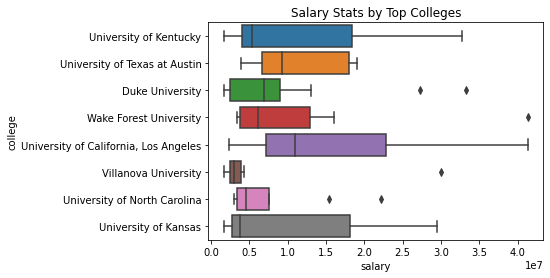

In [169]:
top_colleges = college_data[college_data.groupby('college').college.transform('count')>6]
sns.boxplot(x="salary", y="college", data=top_colleges)
plt.title("Salary Stats by Top Colleges")
plt.show()

In [179]:
print("Top 10 Team's AVG Salary")
top_avg = top_colleges.groupby('college')['salary'].mean().round().to_frame()
top_avg.sort_values(by='salary', ascending=False)

Top 10 Team's AVG Salary


,salary
college,
"University of California, Los Angeles",15814423.0
Wake Forest University,12022301.0
University of Kentucky,11793688.0
University of Texas at Austin,11355087.0
University of Kansas,10990861.0
Duke University,8579842.0
University of North Carolina,7671159.0
Villanova University,6792351.0


In [288]:
ucla = top_colleges.where(top_colleges['college']=='University of California, Los Angeles')
ucla = ucla.dropna()
ucla.head()

,Unnamed: 0,player,team,AGE,RANK,salary,college,height,position,weight,shoots
7,97.0,Kyle Anderson,MEM,26.0,128.0,9505100.0,"University of California, Los Angeles",6.9,Small Forward,230.0,Right
14,127.0,Trevor Ariza,POR,35.0,96.0,12800000.0,"University of California, Los Angeles",6.8,Small Forward and Shooting Guard,215.0,Right
19,191.0,Lonzo Ball,NOP,22.0,111.0,11003782.0,"University of California, Los Angeles",6.6,Point Guard,190.0,Right
144,1864.0,Aaron Holiday,IND,23.0,314.0,2345640.0,"University of California, Los Angeles",6.1,Point Guard,185.0,Right
145,1865.0,Jrue Holiday,NOP,30.0,43.0,26131111.0,"University of California, Los Angeles",6.4,Point Guard and Shooting Guard,205.0,Right


In [180]:
print("All Team's AVG Salary")
col_avg = college_data.groupby('college')['salary'].mean().round().to_frame()
col_avg.sort_values(by='salary', ascending=False).head(10)

All Team's AVG Salary


,salary
college,
University of Oklahoma,24593525.0
University of Connecticut,23594344.0
"University of California, Los Angeles",15814423.0
Marquette University,15753367.0
Texas A&M University,15392467.0
University of Virginia,13925593.0
University of Florida,13849639.0
University of Louisville,13705775.0
Wake Forest University,12022301.0


### WNBA Salary Data
We will now analyze some of the salaries and corresponding data from the Women's National Basketball Association (WNBA).

### Women Statistics by Team

In [145]:
clean_data = pd.read_csv("wnba_data.csv")
clean_data.head()

,Unnamed: 0,player,position,age,salary,team
0,0,DeWanna Bonner,F,33.0,221450.0,CON
1,1,Skylar Diggins-Smith,G,30.0,221450.0,PHX
2,2,Brittney Griner,C,30.0,221450.0,PHX
3,3,Diana Taurasi,G,38.0,221450.0,PHX
4,4,Sue Bird,G,40.0,221450.0,SEA


In [152]:
clean_data['salary'].describe().round(1)

count       187.0
mean      97852.5
std       52866.8
min       58170.0
25%       58710.0
50%       70040.0
75%      124750.0
max      221450.0
Name: salary, dtype: float64

In [146]:
print("Mean age and salary by team")
clean_data.groupby(['team']).mean(['age','salary']).round()

Mean age and salary by team


,Unnamed: 0,age,salary
team,,,
ATL,85.0,26.0,102244.0
CHI,83.0,26.0,99114.0
CON,92.0,26.0,108047.0
DAL,96.0,24.0,86055.0
IND,100.0,25.0,87804.0
LA,87.0,27.0,98941.0
LV,93.0,25.0,111266.0
MIN,95.0,24.0,97824.0
NY,92.0,25.0,90235.0


In [293]:
clean_data.groupby('team')['salary'].mean().describe().round()

count        12.0
mean      98429.0
std        8399.0
min       86055.0
25%       90186.0
50%       99028.0
75%      103641.0
max      111266.0
Name: salary, dtype: float64

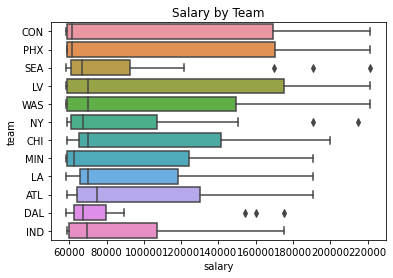

In [147]:
sns.boxplot(x="salary",y="team", data=clean_data)
plt.title("Salary by Team")
plt.show()

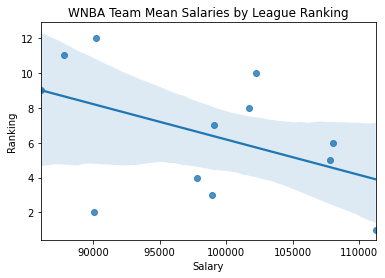

Regression slope of salary: -0.0002


In [148]:
team_avg = clean_data.groupby(['team']).mean(['salary']).round()
team_avg['ranking']= [10,7,6,9,11,3,1,4,12,5,2,8]

#sns.relplot(x="salary", y="ranking", hue="team", data=team_avg)
sns.regplot(x="salary", y="ranking", data=team_avg)
plt.xlabel('Salary')
plt.ylabel('Ranking')
plt.title('WNBA Team Mean Salaries by League Ranking')
plt.show()

regressor = lr() 
regressor.fit(team_avg[['salary']],team_avg['ranking']) 
m= regressor.coef_[0]
b= regressor.intercept_
print('Regression slope of salary: {: .1}'.format(m))

In [115]:
print("Mean age and salary by postion")
clean_data.groupby(['position']).mean(['age','salary'])

Mean age and salary by postion


,age,salary
position,,
C,23.548387,93625.774194
F,24.250000,93024.887500
G,24.870370,91165.851852
PF,19.000000,70040.000000
PG,24.000000,58710.000000


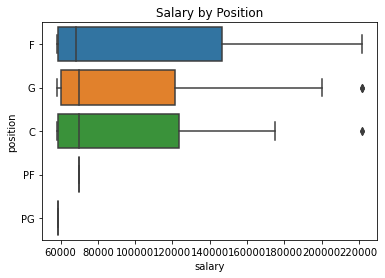

In [153]:
sns.boxplot(x="salary",y="position", data=clean_data)
plt.title("Salary by Position")
plt.show()

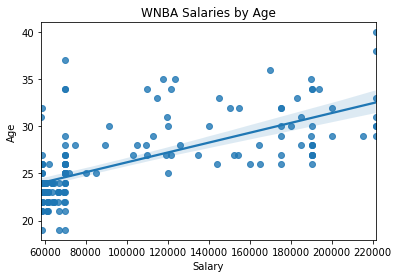

In [156]:
age_data = clean_data[clean_data['age'].between(16,80)]
sns.regplot(x="salary", y="age", data=age_data)
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('WNBA Salaries by Age')
plt.show()

## Evaluation of Significance:
___

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

### T-Test for NBA and WNBA Disparity 

In [215]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure
warnings.filterwarnings("ignore")

NBA Salary Distribution


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

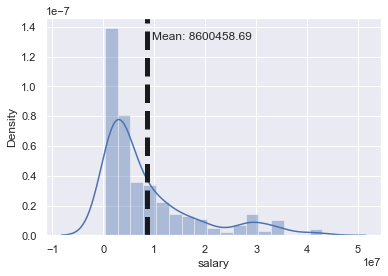

In [217]:
print("NBA Salary Distribution")
plot_distribution(player_metrics['salary'])

WNBA Salary Distribution


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

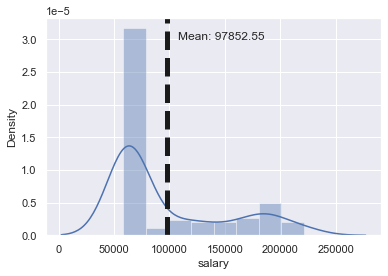

In [218]:
print("WNBA Salary Distribution")
plot_distribution(clean_data['salary'])

In [226]:
def compare_sal(arr1, arr2, alpha, sample_size):
    stat, p = ttest_ind(arr1, arr2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [228]:
s_size = 20
nba_sample = np.random.choice(player_metrics['salary'], s_size)
wnba_sample = np.random.choice(clean_data['salary'], s_size)
compare_sal(nba_sample, wnba_sample, 0.05, s_size)

Statistics=3.404, p=0.002
Different distributions (reject H0)


### T-Test for NBA Race Disparity

In [221]:
nba_race = pd.read_csv("nba_race.csv")
nba_race.groupby('race')[['salary','RANK']].mean().round()

,salary,RANK
race,,
black,11414366.0,182.0
hispanic,7300000.0,163.0
white,7992017.0,198.0


NBA: Black/African-American Salary Distribution


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

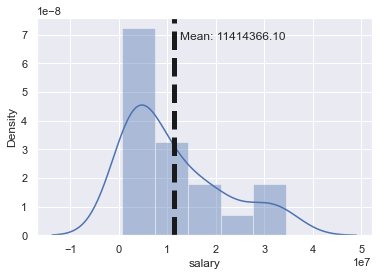

In [223]:
print("NBA: Black/African-American Salary Distribution")
plot_distribution(nba_race['salary'].where(nba_race['race']=='black'))

NBA: White Salary Distribution


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

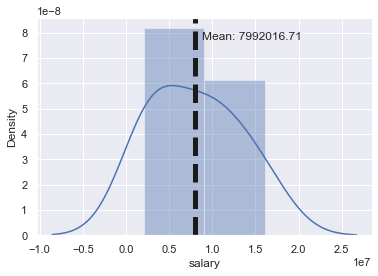

In [224]:
print("NBA: White Salary Distribution")
plot_distribution(nba_race['salary'].where(nba_race['race']=='white'))

In [259]:
nba_b = nba_race['salary'].where(nba_race['race']== "black")
nba_b = nba_b.dropna()
nba_w = nba_race['salary'].where(nba_race['race']== "white")
nba_w = nba_w.dropna()

s_size = 10
black_sample = np.random.choice(nba_b, s_size)
white_sample = np.random.choice(nba_w, s_size)
compare_sal(black_sample, white_sample, 0.05, s_size)

Statistics=1.591, p=0.129
Same distributions (fail to reject H0)


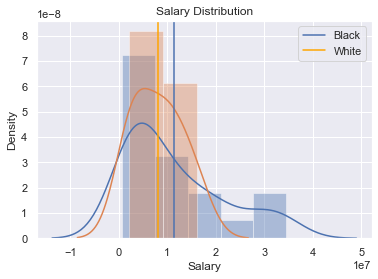

In [268]:
plt.figure()
ax1 = sns.distplot(nba_b)
ax2 = sns.distplot(nba_w)
plt.axvline(np.mean(nba_b), color='b', label="Black")
plt.axvline(np.mean(nba_w), color='orange', label="White")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.legend(loc='upper right')
plt.show()

In [260]:
rank_b = nba_race['RANK'].where(nba_race['race']== "black")
rank_b = nba_b.dropna()
rank_w = nba_race['RANK'].where(nba_race['race']== "white")
rank_w = nba_w.dropna()

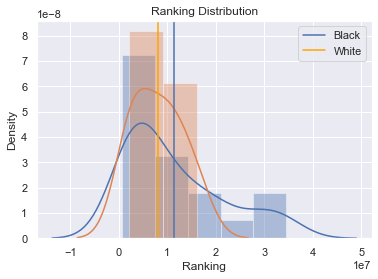

In [267]:
plt.figure()
ax1 = sns.distplot(rank_b)
ax2 = sns.distplot(rank_w)
plt.axvline(np.mean(rank_b), color='b', label="Black")
plt.axvline(np.mean(rank_w), color='orange', label="White")
plt.title("Ranking Distribution")
plt.xlabel("Ranking")
plt.legend(loc='upper right')
plt.show()

In [261]:
s_size = 10
black_sample2 = np.random.choice(rank_b, s_size)
white_sample2 = np.random.choice(rank_w, s_size)
compare_sal(black_sample2, white_sample2, 0.05, s_size)

Statistics=0.807, p=0.430
Same distributions (fail to reject H0)


### NBA Salary Predictions
Some of the performance metrics appear to have very strong correlations with each NBA players salaries. 

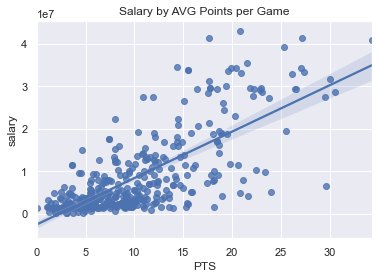

The regression slope of the PTS variable is 1088149.75



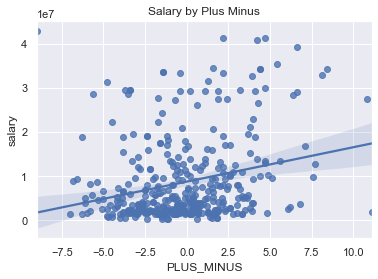

The regression slope of the PLUS_MINUS variable is 780562.64



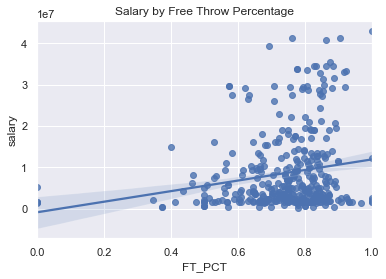

The regression slope of the FT_PCT variable is 12789058.45



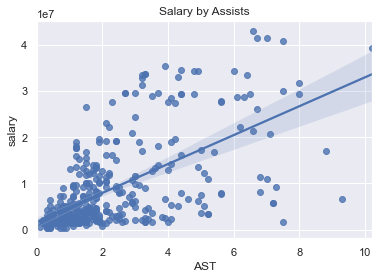

The regression slope of the AST variable is 3124072.35



In [295]:
sns.regplot(data = player_metrics, x= "PTS", y = "salary")
plt.title("Salary by AVG Points per Game")
plt.show()
#player_metrics = player_metrics.dropna()
linear_reg = LinearRegression().fit(player_metrics[["PTS"]], player_metrics["salary"])
x=linear_reg.coef_[0].round(2)
print("The regression slope of the PTS variable is {:.2f}".format(x))
print("")

sns.regplot(data = player_metrics, x= "PLUS_MINUS", y = "salary")
plt.title("Salary by Plus Minus")
plt.show()
#player_metrics = player_metrics.dropna()
linear_reg = LinearRegression().fit(player_metrics[["PLUS_MINUS"]], player_metrics["salary"])
x=linear_reg.coef_[0].round(2)
print("The regression slope of the PLUS_MINUS variable is {:.2f}".format(x))
print("")

sns.regplot(data = player_metrics, x= "FT_PCT", y = "salary")
plt.title("Salary by Free Throw Percentage")
plt.show()
#player_metrics = player_metrics.dropna()
linear_reg = LinearRegression().fit(player_metrics[["FT_PCT"]], player_metrics["salary"])
x=linear_reg.coef_[0].round(2)
print("The regression slope of the FT_PCT variable is {:.2f}".format(x))
print("")

sns.regplot(data = player_metrics, x= "AST", y = "salary")
plt.title("Salary by Assists")
plt.show()
#player_metrics = player_metrics.dropna()
linear_reg = LinearRegression().fit(player_metrics[["AST"]], player_metrics["salary"])
x=linear_reg.coef_[0].round(2)
print("The regression slope of the AST variable is {:.2f}".format(x))
print("")

First we are going to see the non-performance factors that have the largest influence on salary.

In [163]:
for column in ['AGE','RANK','height','weight']:
    regressor = lr() 
    regressor.fit(nba_background[[column]],nba_background['salary']) 
    m= regressor.coef_[0]
    print('Predictor Variable: ',column)
    print('Estimated slope: ', round(m,2))
    print("Correlation: {: .2}".format(regressor.score(nba_background[[column]],nba_background['salary'])))
    print("")

Predictor Variable:  AGE
Estimated slope:  574384.09
Correlation:  0.051

Predictor Variable:  RANK
Estimated slope:  -52943.84
Correlation:  0.56

Predictor Variable:  height
Estimated slope:  -2847987.97
Correlation:  0.0085

Predictor Variable:  weight
Estimated slope:  36903.25
Correlation:  0.0082



We will then determine the top performance metrics that have the strongest correlation with salary. 

In [164]:
for column in ['MIN','GP','PTS','REB','AST','FG_PCT','FT_PCT']:
    regressor = lr() 
    regressor.fit(player_metrics[[column]],player_metrics['salary']) 
    m= regressor.coef_[0]
    print('Predictor Variable: ',column)
    print('Estimated slope: ', round(m,2))
    print("Correlation: {: .2}".format(regressor.score(player_metrics[[column]],player_metrics['salary'])))
    print("")

Predictor Variable:  MIN
Estimated slope:  717637.65
Correlation:  0.41

Predictor Variable:  GP
Estimated slope:  113268.29
Correlation:  0.053

Predictor Variable:  PTS
Estimated slope:  1088149.75
Correlation:  0.54

Predictor Variable:  REB
Estimated slope:  1850143.22
Correlation:  0.24

Predictor Variable:  AST
Estimated slope:  3124072.35
Correlation:  0.38

Predictor Variable:  FG_PCT
Estimated slope:  4522180.47
Correlation:  0.0016

Predictor Variable:  FT_PCT
Estimated slope:  12789058.45
Correlation:  0.038



The predictor variables that had the strongest correlation were the player's subjective ranking in the league, MIN, PTS, and AST. Therefore, we will use these variables in our multilinear model to predict salary.

In [165]:
multi_model = lr()
multi_model.fit(player_metrics[['RANK','MIN','PTS','AST']],player_metrics['salary'])
multi_model_cf = multi_model.coef_
multi_model_score = multi_model.score(player_metrics[['RANK','MIN','PTS','AST']],player_metrics['salary'])
print(multi_model_cf)
print("R squared score: {: .2}".format(multi_model_score))

[ -34303.32532202 -274705.59939154  738971.1556192   792914.52320181]
R squared score:  0.71


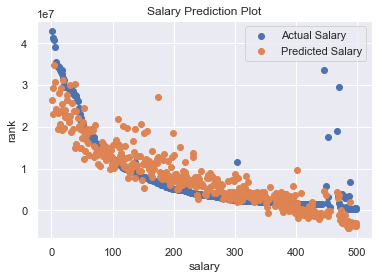

In [271]:
plt.scatter(player_metrics['RANK'], player_metrics['salary'], label="Actual Salary")
plt.scatter(player_metrics["RANK"], multi_model.predict(player_metrics[['RANK','MIN','PTS','AST']]), label="Predicted Salary")
plt.xlabel("salary")
plt.ylabel("rank")
plt.title("Salary Prediction Plot")
plt.legend(loc="upper right")
plt.show()

### Predicting Our Favorite Players

In [289]:
lebron = player_metrics.where(player_metrics['player']== 'LeBron James')
lebron = lebron.dropna()
print("LeBron James' Actual Salary:", lebron['salary'].to_frame())
print("LeBron Lebron James' Predicted Salary:", multi_model.predict(lebron[['RANK','MIN','PTS','AST']]))

print("")
dwight = player_metrics.where(player_metrics['player']== 'Dwight Howard')
dwight = dwight.dropna()
print("Dwight Howard's Actual Salary:", dwight['salary'].to_frame())
print("Dwight Howard's Predicted Salary:", multi_model.predict(dwight[['RANK','MIN','PTS','AST']]))

print("")
aaron = player_metrics.where(player_metrics['player']== 'Aaron Holiday')
aaron = aaron.dropna()
print("Aaron Holiday's Actual Salary:", aaron['salary'].to_frame())
print("Aaron Holiday's Predicted Salary:", multi_model.predict(aaron[['RANK','MIN','PTS','AST']]))

LeBron James' Actual Salary:          salary
238  39219565.0
LeBron Lebron James' Predicted Salary: [30697428.14982481]

Dwight Howard's Actual Salary:         salary
110  2564753.0
Dwight Howard's Predicted Salary: [4238753.8751599]

Aaron Holiday's Actual Salary:       salary
1  2345640.0
Aaron Holiday's Predicted Salary: [5838967.48794234]


## Conclusion:
___
Going into this project, our group initially thought the majority of the NBA salaries were primarily based off of performance. We also thought that we would see other factors such as height or age stongly correlated with salary. Additionally, we anticipated the possibility of seeing salary disparities regarding race within the NBA and salary disparities regarding gender within American professional baskeball as a whole.

Our group discovered some interesting findings while exploring our data. When we analyzed the average salaries by NBA teams in the league, we found that there was a rather large statistical dispersion with the standard deviation being about \$1.8 million. This is huge in comparisson to the WNBA team's average salaries which had a standard deviation of about \$8,300. Golden State Warriors (GSW) pays their players the most with an approximately $12 million average salary per player. We found this interesting considering GSW was the eighth best team in the Western conference this year. The Atlanta Hawks pays their players the least and they did pretty well this year coming in fourth in the Eastern conference. We noticed that Western Conference teams pay their players considerably more than Eastern conference team.

Our group uncovered the colleges/universities that send the most players to league. The top 3 schools with the most alumni in the NBA right now are University of Kentucky, Duke, and UCLA, respectively. Although Kentucky had a rough season, it is no concidence that these schools are some of the top ranked colleges for basketball. We found players coming from certain colleges make significantly more on average. For example, UCLA graduates make on average $15.8 million a year! This is 83.7% more than our NBA sample's average salary of $8.6 million. We think playing at a top basketball school could possibly contribute to a player earning more.

**Salary Disparities:** The overall mean salary for the NBA was about \$8.6 million, where as the overall mean salary for the WNBA was about \$97,000. This means professional women's baskeball players make about a penny for every dollar made by their male counterparts. When running our t-test, we received a p-value of .002 and rejected our null hypothesis that these were the same distributions. We also ran a t-test for salaries in the NBA on the basis or race by taking a random sample of the Black/African American players salaries and the White players salaries. (Other races did not have enough data.) Although our test did not have the ideal t-test parameters, we ended up failing to reject our null hypothesis and concluding our values came from the same distribution. Although the white salaries were lower on average than the Black player's salaries, we found that the white players' overall performance/league ranking was lower than the Black players' performance which could be the reason for the lower salaries.    

**Salary Predictions:** Our group found the correlations of all the prominent factors, both performance and general, relating to the NBA palyers' salaries. We then created a multi-linear regression model that factored in the player's ranking in the league, average points per game, assits, and MIN. Our final model had an r squared value of .71. When we tested our model by predicting how much our favorite players make, we realized the model's predictions were unfortunately far from accurate. 

## Limitations:
---


## Appendix:
___
- **Source Code:** link to our github: 

- **Acknowledgments:** We used a lot of great resources and learned a lot while working on this project. If we had more time our group would have wanted to included a metric for how well people know and love the player. We think this metric could have a strong relationship with salary as well. Could this be the reason our model says Lebron should only be making $30 million and not $39 million (his current salary)? We would want to do a deeper dive into this data.

- **Data cleaning description:** 
For the NBA player stats and metrics, we extracted data from the offical NBA website. We were not able to use beautiful soup because to get this data, the data is requested by the page and then is embedded into HTML. To work with this, we first created an url header. We then specificed desired filters such as Regular Season, 2019-2020 season, and from 10/20/19 which is the start of the 2019-2020 season. After converting it into a data frame, we filtered for columns that were relevant for possibly influencing the salary of a player. We exported an NBA salary data set from this website: https://www.basketball-reference.com/contracts/players.html. We had to clean up the dataset by converting the salary values from currency types to general types. 

We used the same method mentioned above to extract the data for WNBA salaries data which can be found at: https://www.spotrac.com/wnba/rankings/base/

For our NBA Race data, we took a random sample of about 50 players in the league. We then exported this data to excel and entered a race column where we typed in each player's race. The player's race was found via google. We then transformed data back to cssv file.  